In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

In [3]:
#wczytanie i zlaczenie plikow
allFiles = ['dane.csv', 'dane2.csv', 'dane3.csv']
data = []
for f in allFiles:
    df = pd.read_csv(f, sep=';')
    data.append(df)
frame = pd.merge(data[0], data[1], on='Data')
frame = pd.merge(frame, data[2], on='Data')

In [4]:
#zmiana nazw kolumn
columns = { 'Data' : 'date', 'poziom wody w piezometrze B1 npm [cm]': 'waterlv',
            'temperatura wody w piezometrze B1 [C]': 'watertemp',
            'poziom morza': 'sealv',
            'Opady' : 'precip', 'Temperatura powietrza [C]': 'temp',
            'Prędkość wiatru' : 'vwind', 'Kierunek wiatru' : 'dwind' }
frame = frame[list(columns.keys())].rename(columns=columns)

In [5]:
frame[0:3]

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind
0,2008-09-23,67.21,12.57,493.50,0.0,12.13,3.88,66.25
1,2008-09-24,66.29,12.56,490.67,0.0,10.86,4.50,53.75
2,2008-09-25,65.21,12.54,486.67,0.0,10.05,2.63,30.00


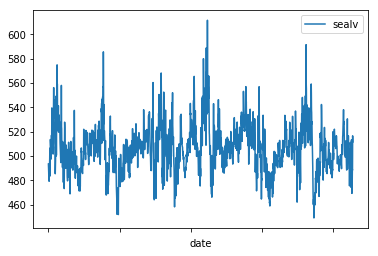

In [6]:
#wykres zmiany poziomu morza w czasie
frame.plot(x='date', y='sealv')

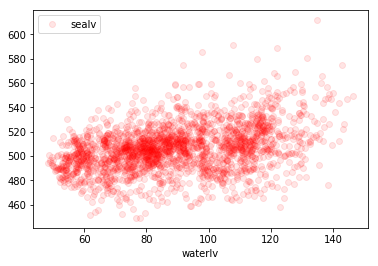

In [7]:
#wykres poziom wody w piezometrze w stosunku do poziomu wody w morzu
frame.plot(x='waterlv', y='sealv', style='ro', alpha=0.1)

In [8]:
#zamiana kolumny z datami na typ datetime
frame['date'] = pd.to_datetime(frame['date'])
print (frame['date'].dtype)
frame.set_index(frame["date"],inplace=True)
#suma poziomu wody w piezometrze dla miesiecy
df1 = frame['waterlv'].resample('M', how='sum')

datetime64[ns]


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


In [9]:
#zamiana wartosci kierunku wiatru w stopniach na symbole
def wiatr(angle):
    if angle <= 22.5:
        return 'N'
    elif angle > 22.5 and angle <= 67.5:
        return 'NE'
    elif angle > 67.5 and angle <= 112.5:
        return 'E'
    elif angle > 112.5 and angle <= 157.5:
        return 'SE'
    elif angle > 157.5 and angle <= 202.5:
        return 'S'
    elif angle > 202.5 and angle <= 247.5:
        return 'SW'
    elif angle > 247.5 and angle <= 292.5:
        return 'W'
    elif angle > 292.5 and angle <= 337.5:
        return 'NW'
    else:
        return 'N'
    
frame['wind'] = frame['dwind'].apply(wiatr)

In [10]:
frame[0:10]

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind,wind
date,,,,,,,,,
2008-09-23,2008-09-23,67.21,12.57,493.50,0.0,12.13,3.88,66.25,NE
2008-09-24,2008-09-24,66.29,12.56,490.67,0.0,10.86,4.50,53.75,NE
2008-09-25,2008-09-25,65.21,12.54,486.67,0.0,10.05,2.63,30.00,NE
2008-09-26,2008-09-26,64.33,12.53,481.00,0.0,9.54,1.88,212.50,SW
2008-09-27,2008-09-27,63.40,12.51,480.67,0.0,13.00,6.63,242.50,SW
2008-09-28,2008-09-28,62.59,12.49,479.33,0.9,13.15,7.75,255.00,W
2008-09-29,2008-09-29,61.62,12.47,493.00,5.7,10.96,6.13,240.00,SW
2008-09-30,2008-09-30,61.48,12.44,492.00,2.4,10.29,6.13,207.50,SW
2008-10-01,2008-10-01,61.23,12.42,493.50,9.6,11.06,9.25,213.75,SW


In [11]:
#tworzenie kolumn z wartosciami opadow od 1 do 5 dni wstecz
def precip_before(date, days_count):
    key = date - timedelta(days=days_count)
    if key in frame.index:
        return frame.loc[key]['precip']
    else:
        return None
    
for i in range(1,6):
    frame['precip'+ str(i)] = frame['date'].apply(lambda x : precip_before(x, i))

In [12]:
#tworzenie kolumny z suma opadow 5 dni wstecz
try:
    frame['precipsum']=frame.iloc[:,9:14].sum(axis=1)
except:
    None
        

In [13]:
frame[0:10]

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind,wind,precip1,precip2,precip3,precip4,precip5,precipsum
date,,,,,,,,,,,,,,,
2008-09-23,2008-09-23,67.21,12.57,493.50,0.0,12.13,3.88,66.25,NE,NaN,NaN,NaN,NaN,NaN,0.0
2008-09-24,2008-09-24,66.29,12.56,490.67,0.0,10.86,4.50,53.75,NE,0.0,NaN,NaN,NaN,NaN,0.0
2008-09-25,2008-09-25,65.21,12.54,486.67,0.0,10.05,2.63,30.00,NE,0.0,0.0,NaN,NaN,NaN,0.0
2008-09-26,2008-09-26,64.33,12.53,481.00,0.0,9.54,1.88,212.50,SW,0.0,0.0,0.0,NaN,NaN,0.0
2008-09-27,2008-09-27,63.40,12.51,480.67,0.0,13.00,6.63,242.50,SW,0.0,0.0,0.0,0.0,NaN,0.0
2008-09-28,2008-09-28,62.59,12.49,479.33,0.9,13.15,7.75,255.00,W,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-29,2008-09-29,61.62,12.47,493.00,5.7,10.96,6.13,240.00,SW,0.9,0.0,0.0,0.0,0.0,0.9
2008-09-30,2008-09-30,61.48,12.44,492.00,2.4,10.29,6.13,207.50,SW,5.7,0.9,0.0,0.0,0.0,6.6
2008-10-01,2008-10-01,61.23,12.42,493.50,9.6,11.06,9.25,213.75,SW,2.4,5.7,0.9,0.0,0.0,9.0


In [14]:
#tworzenie kolumny ze srednia temperatura dla 5 dni wstecz
def mean_temp5(date):
    tlist = []
    for i in range(1,6):
        key = date - timedelta(days=i)
        if key in frame.index:
            tlist.append(frame.loc[key]['temp'])
        else:
            return None
    return np.mean(tlist)

frame['meantemp'] = frame['date'].apply(mean_temp5)

In [15]:
frame[0:10]

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind,wind,precip1,precip2,precip3,precip4,precip5,precipsum,meantemp
date,,,,,,,,,,,,,,,,
2008-09-23,2008-09-23,67.21,12.57,493.50,0.0,12.13,3.88,66.25,NE,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2008-09-24,2008-09-24,66.29,12.56,490.67,0.0,10.86,4.50,53.75,NE,0.0,NaN,NaN,NaN,NaN,0.0,NaN
2008-09-25,2008-09-25,65.21,12.54,486.67,0.0,10.05,2.63,30.00,NE,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2008-09-26,2008-09-26,64.33,12.53,481.00,0.0,9.54,1.88,212.50,SW,0.0,0.0,0.0,NaN,NaN,0.0,NaN
2008-09-27,2008-09-27,63.40,12.51,480.67,0.0,13.00,6.63,242.50,SW,0.0,0.0,0.0,0.0,NaN,0.0,NaN
2008-09-28,2008-09-28,62.59,12.49,479.33,0.9,13.15,7.75,255.00,W,0.0,0.0,0.0,0.0,0.0,0.0,11.116
2008-09-29,2008-09-29,61.62,12.47,493.00,5.7,10.96,6.13,240.00,SW,0.9,0.0,0.0,0.0,0.0,0.9,11.320
2008-09-30,2008-09-30,61.48,12.44,492.00,2.4,10.29,6.13,207.50,SW,5.7,0.9,0.0,0.0,0.0,6.6,11.340
2008-10-01,2008-10-01,61.23,12.42,493.50,9.6,11.06,9.25,213.75,SW,2.4,5.7,0.9,0.0,0.0,9.0,11.388


In [16]:
# usuniecie wierszy z NaN
frame = frame.dropna()
frame[0:10]

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind,wind,precip1,precip2,precip3,precip4,precip5,precipsum,meantemp
date,,,,,,,,,,,,,,,,
2008-09-28,2008-09-28,62.59,12.49,479.33,0.9,13.15,7.75,255.00,W,0.0,0.0,0.0,0.0,0.0,0.0,11.116
2008-09-29,2008-09-29,61.62,12.47,493.00,5.7,10.96,6.13,240.00,SW,0.9,0.0,0.0,0.0,0.0,0.9,11.320
2008-09-30,2008-09-30,61.48,12.44,492.00,2.4,10.29,6.13,207.50,SW,5.7,0.9,0.0,0.0,0.0,6.6,11.340
2008-10-01,2008-10-01,61.23,12.42,493.50,9.6,11.06,9.25,213.75,SW,2.4,5.7,0.9,0.0,0.0,9.0,11.388
2008-10-02,2008-10-02,61.33,12.40,497.83,0.0,10.30,11.38,220.00,SW,9.6,2.4,5.7,0.9,0.0,18.6,11.692
2008-10-03,2008-10-03,63.72,12.39,506.17,0.2,9.19,7.00,211.25,SW,0.0,9.6,2.4,5.7,0.9,18.6,11.152
2008-10-04,2008-10-04,65.63,12.37,506.50,0.0,8.95,6.38,225.00,SW,0.2,0.0,9.6,2.4,5.7,17.9,10.360
2008-10-05,2008-10-05,66.91,12.35,483.67,0.5,8.83,7.88,198.75,S,0.0,0.2,0.0,9.6,2.4,12.2,9.958
2008-10-06,2008-10-06,67.23,12.33,504.67,0.0,9.70,3.13,237.50,SW,0.5,0.0,0.2,0.0,9.6,10.3,9.666


In [17]:
# zapis do pliku csv
frame.to_csv('result.csv')

Eksploracja

In [18]:
#shape
frame.shape

(2129, 16)

In [19]:
#data types
print(frame.dtypes)

date         datetime64[ns]
waterlv             float64
watertemp           float64
sealv               float64
precip              float64
temp                float64
vwind               float64
dwind               float64
wind                 object
precip1             float64
precip2             float64
precip3             float64
precip4             float64
precip5             float64
precipsum           float64
meantemp            float64
dtype: object


In [20]:
#head
frame.head(15)

,date,waterlv,watertemp,sealv,precip,temp,vwind,dwind,wind,precip1,precip2,precip3,precip4,precip5,precipsum,meantemp
date,,,,,,,,,,,,,,,,
2008-09-28,2008-09-28,62.59,12.49,479.33,0.9,13.15,7.75,255.00,W,0.0,0.0,0.0,0.0,0.0,0.0,11.116
2008-09-29,2008-09-29,61.62,12.47,493.00,5.7,10.96,6.13,240.00,SW,0.9,0.0,0.0,0.0,0.0,0.9,11.320
2008-09-30,2008-09-30,61.48,12.44,492.00,2.4,10.29,6.13,207.50,SW,5.7,0.9,0.0,0.0,0.0,6.6,11.340
2008-10-01,2008-10-01,61.23,12.42,493.50,9.6,11.06,9.25,213.75,SW,2.4,5.7,0.9,0.0,0.0,9.0,11.388
2008-10-02,2008-10-02,61.33,12.40,497.83,0.0,10.30,11.38,220.00,SW,9.6,2.4,5.7,0.9,0.0,18.6,11.692
2008-10-03,2008-10-03,63.72,12.39,506.17,0.2,9.19,7.00,211.25,SW,0.0,9.6,2.4,5.7,0.9,18.6,11.152
2008-10-04,2008-10-04,65.63,12.37,506.50,0.0,8.95,6.38,225.00,SW,0.2,0.0,9.6,2.4,5.7,17.9,10.360
2008-10-05,2008-10-05,66.91,12.35,483.67,0.5,8.83,7.88,198.75,S,0.0,0.2,0.0,9.6,2.4,12.2,9.958
2008-10-06,2008-10-06,67.23,12.33,504.67,0.0,9.70,3.13,237.50,SW,0.5,0.0,0.2,0.0,9.6,10.3,9.666


In [22]:
#descriptions
print(frame.describe())

           waterlv    watertemp        sealv       precip         temp  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean     89.282353     9.550714   506.334171     1.905838     7.919333   
std      21.178420     2.011780    19.060688     4.318492     7.436094   
min      48.500000     6.320000   449.270000     0.000000   -16.580000   
25%      73.500000     7.690000   494.330000     0.000000     2.630000   
50%      87.260000     9.330000   506.000000     0.090000     7.590000   
75%     106.910000    11.570000   516.600000     1.700000    13.980000   
max     146.330000    12.800000   611.440000    47.000000    27.810000   

             vwind        dwind      precip1      precip2      precip3  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean      4.606801   180.649624     1.909549     1.912607     1.906736   
std       2.243889    70.911251     4.320333     4.321564     4.316912   
min       0.380000    13.750000     0

In [40]:
frame14 = frame[frame.columns.difference(['date', 'wind'])]

In [41]:
#correlation
corr = frame.corr(method = 'pearson')
print(corr)

            waterlv  watertemp     sealv    precip      temp     vwind  \
waterlv    1.000000  -0.098659  0.359107  0.005270 -0.337894 -0.000283   
watertemp -0.098659   1.000000  0.341774  0.155111  0.539043 -0.009573   
sealv      0.359107   0.341774  1.000000  0.176834  0.149137  0.053729   
precip     0.005270   0.155111  0.176834  1.000000  0.144730  0.126234   
temp      -0.337894   0.539043  0.149137  0.144730  1.000000  0.026328   
vwind     -0.000283  -0.009573  0.053729  0.126234  0.026328  1.000000   
dwind      0.068600   0.081435  0.158080  0.076639  0.069502  0.357772   
precip1    0.026013   0.157001  0.230579  0.176040  0.116302  0.188780   
precip2    0.058660   0.158838  0.191014  0.095769  0.100086  0.053903   
precip3    0.079909   0.159606  0.173910  0.029291  0.101746  0.012702   
precip4    0.090588   0.159982  0.167553  0.084179  0.109871 -0.016505   
precip5    0.098240   0.162470  0.170070  0.069315  0.111061 -0.024950   
precipsum  0.130997   0.295772  0.3459

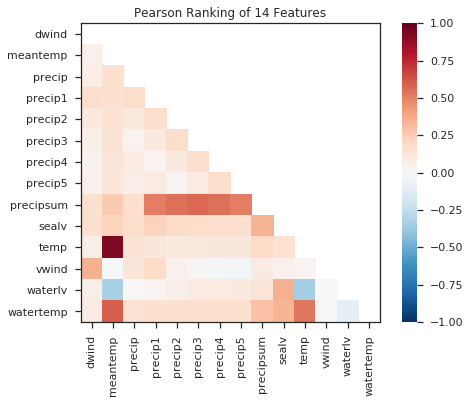

In [42]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(frame14)
visualizer.poof()

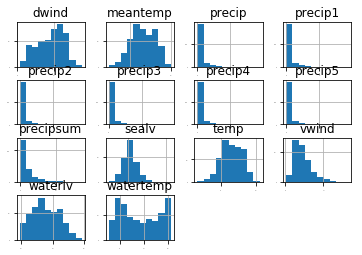

In [27]:
import matplotlib.pyplot as plt
#histograms
frame.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1)
plt.show()

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


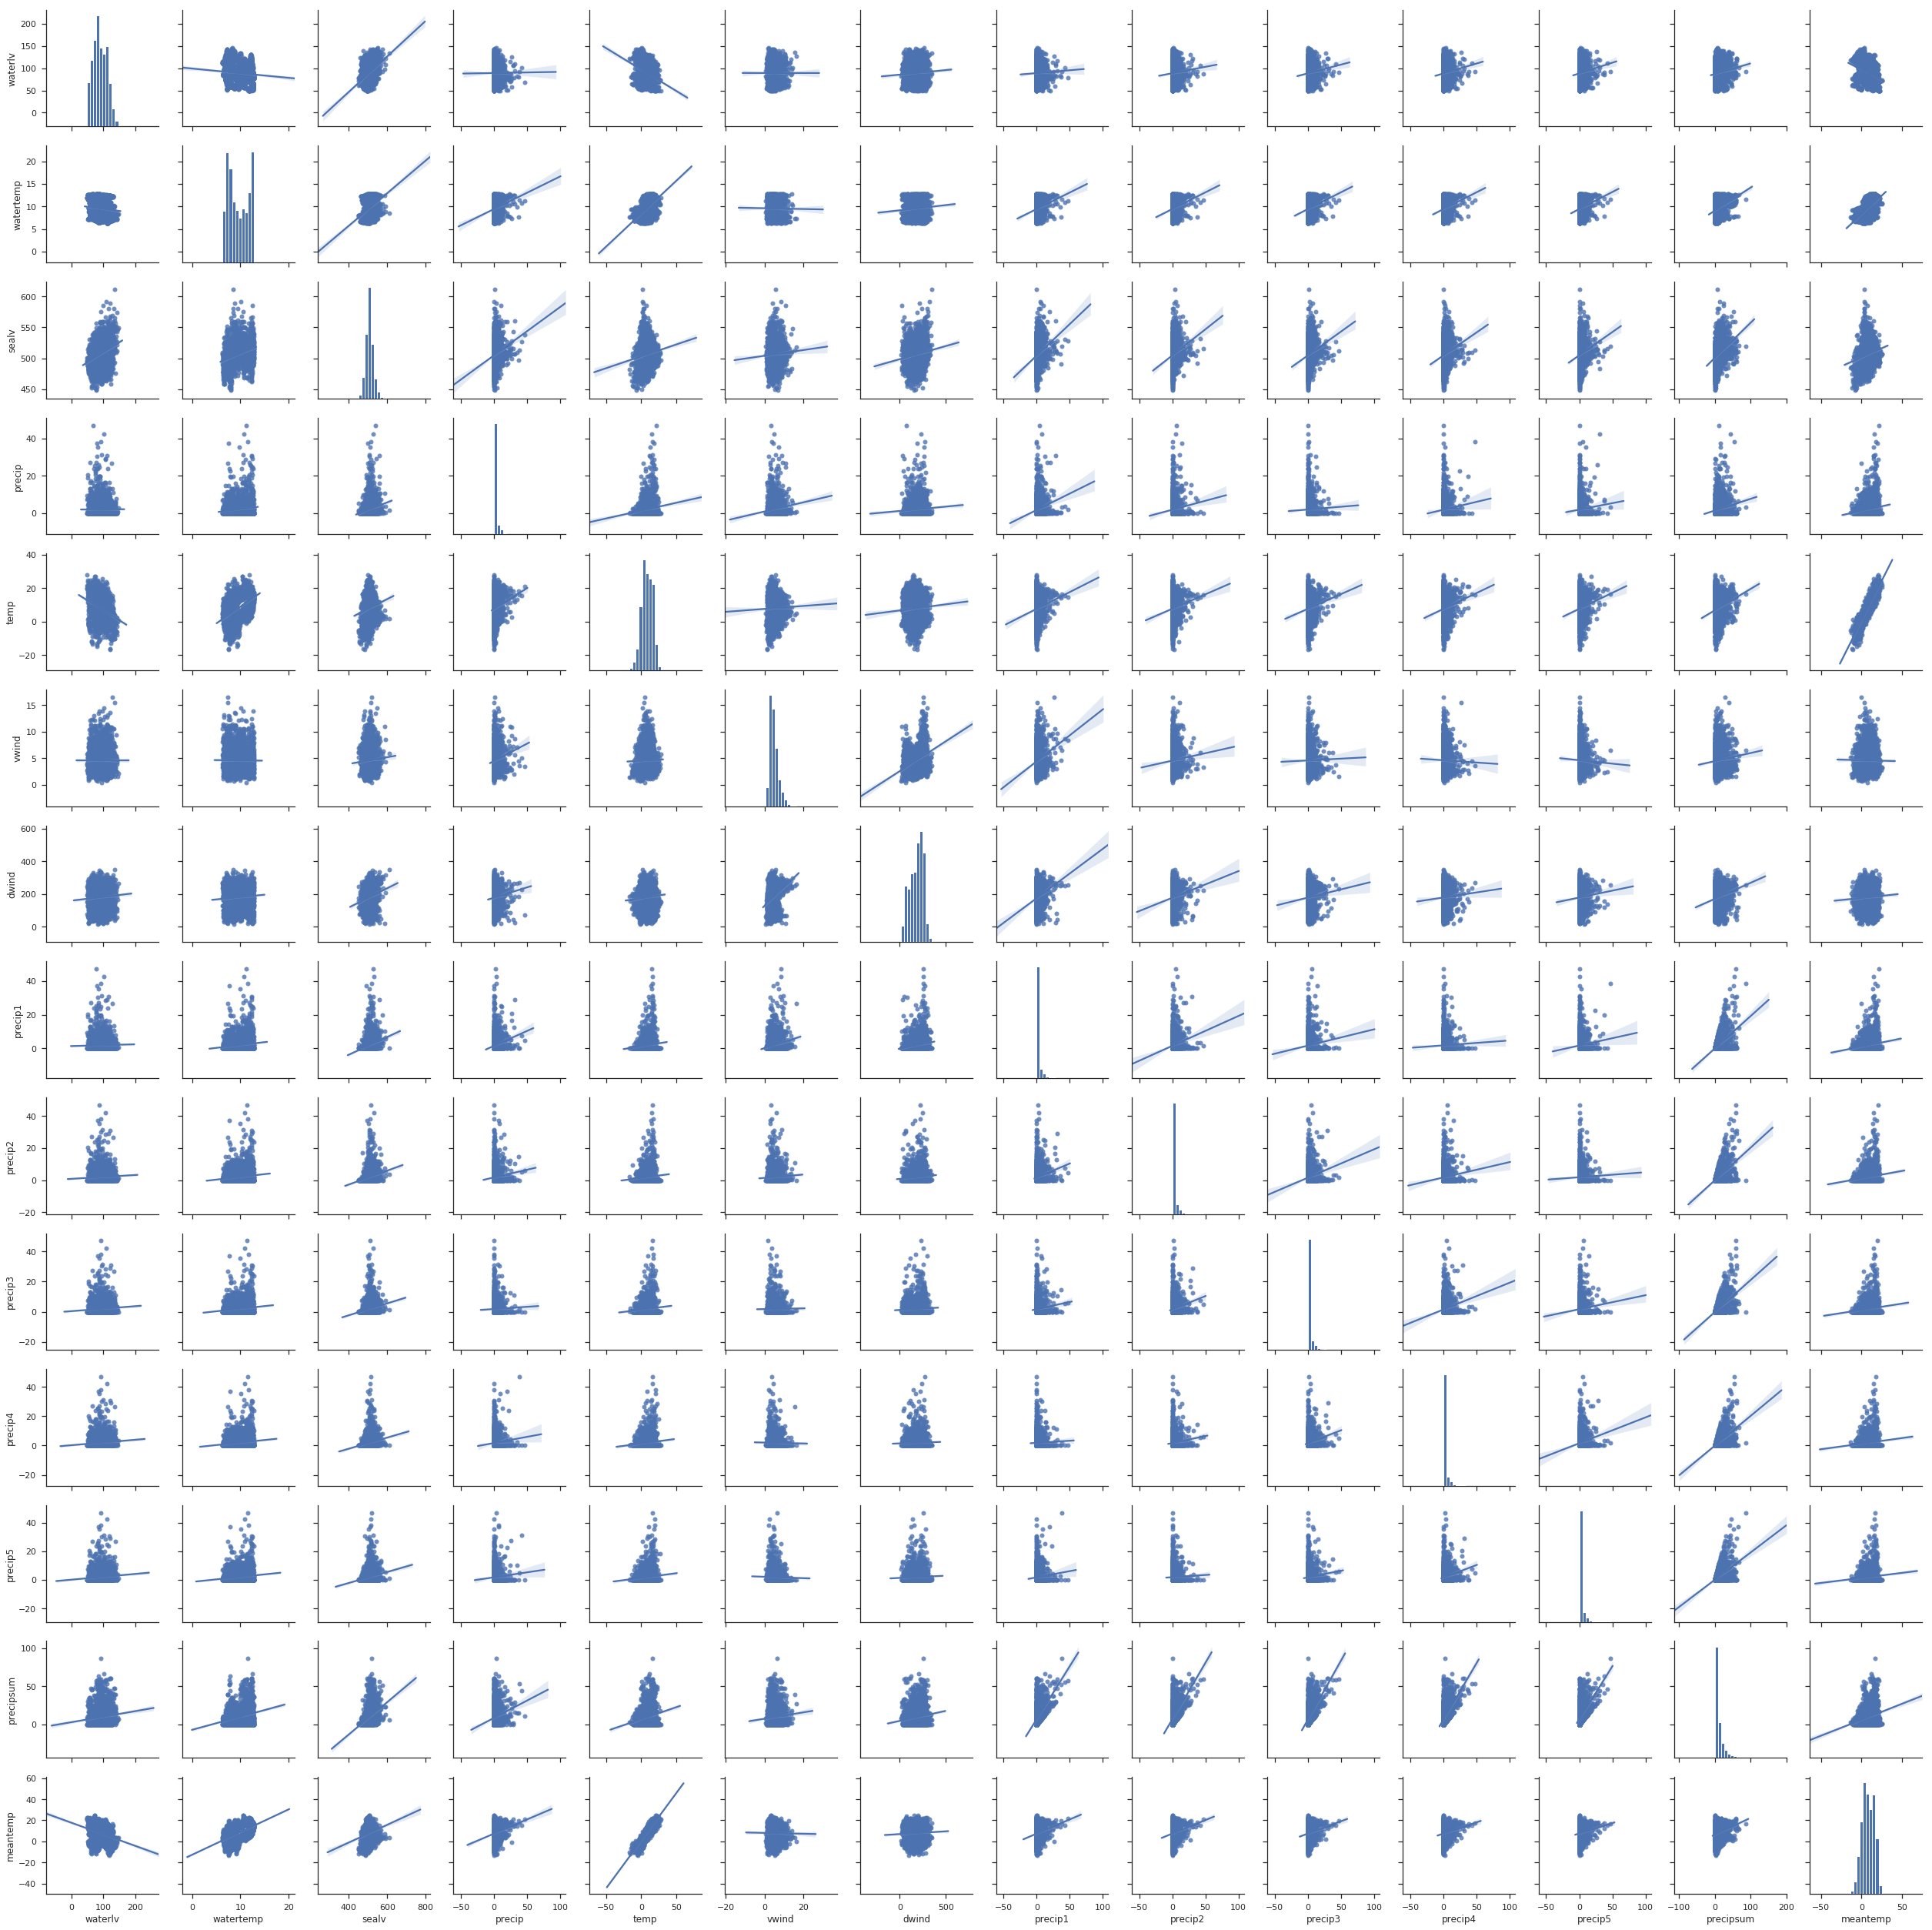

In [39]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(data=frame, kind="reg")

In [38]:
#skewness
skew = frame.skew()
print(skew)

waterlv      0.192278
watertemp    0.136306
sealv        0.428498
precip       4.210356
temp        -0.154314
vwind        1.160223
dwind       -0.320087
precip1      4.203751
precip2      4.198780
precip3      4.211221
precip4      4.211071
precip5      4.206216
precipsum    1.983224
meantemp    -0.150414
dtype: float64


In [58]:
#split-out validation dataset
from sklearn.model_selection import train_test_split
array = frame.values
X = array[:, (2,3,4,5,6,7,9,10,11,12,13,14,15)]
Y = array[:, 1]
validation_size = 0.20
seed = 7 
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size = validation_size, random_state = seed)

ValueError: color kwarg must have one color per data set. 1 data sets and 1703 colors were provided

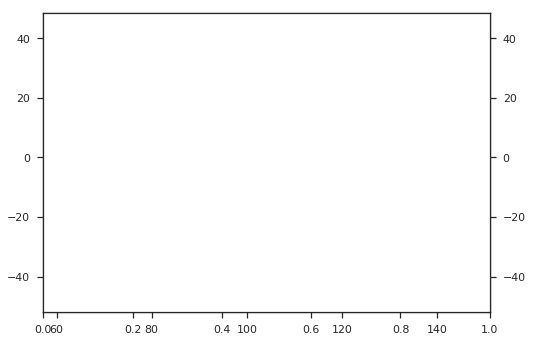

In [59]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()